In [71]:
import math as m
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import time
from scipy.linalg import eigh
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import eigs
import matplotlib as ml
import matplotlib.pyplot as pp
%matplotlib inline

In [85]:
n = 5
h = 1.0 / n
eps = 0.0001

In [86]:
def MatrA(n):
    A = np.zeros( (n**2, n**2) )
    for i in range(n**2):
        for j in range(n**2):
            if i == j:
                A[i][j] = 4.0  
                continue
            elif (j == i + 1 and i % n == 0) or (j == i - 1 and i % n == n - 1) or (i in list(range(0, n)) and j == i + n) or (i in list(range(n**2 - n, n**2)) and j == i - n): 
                A[i][j] = -2.0 
                continue
            elif (j == i - 1 or j == i + 1) and not ((i % n == n - 1 and j == i + 1) or (i % n == 0 and j == i - 1)) or (j == i - n or j == i + n): 
                A[i][j] = -1.0 
                continue
            A[i][j] = 0.0
    
    return A

A = MatrA(n)

for i in range(n**2):
    for j in range(n**2):
        print(A[i][j], end = ' ')
    print()

4.0 -2.0 0.0 0.0 0.0 -2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
-1.0 4.0 -1.0 0.0 0.0 0.0 -2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 -1.0 4.0 -1.0 0.0 0.0 0.0 -2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 -1.0 4.0 -1.0 0.0 0.0 0.0 -2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 -2.0 4.0 0.0 0.0 0.0 0.0 -2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
-1.0 0.0 0.0 0.0 0.0 4.0 -2.0 0.0 0.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 -1.0 0.0 0.0 0.0 -1.0 4.0 -1.0 0.0 0.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 -1.0 0.0 0.0 0.0 -1.0 4.0 -1.0 0.0 0.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 -1.0 0.0 0.0 0.0 -1.0 4.0 -1.0 0.0 0.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 -1.0 0.0 0.0 0.0 -2.0 4.0 0.0 0.0 0.0 0.0 -1.0 

In [58]:
def MakeUnitSparseMatrix(erow, edata, n):
     for i in range(n**2):
        erow.append(i)
        edata.append(1)
            
            
def MakeSparseMatrix(row, col, data, n):
     for i in range(n**2):
        for j in range(n**2):
            if i == j:
                a = 4  
                row.append(i)
                col.append(j)
                data.append(a)
                continue
            if j == i + 1 and i % n == 0:
                a = -2
                row.append(i)
                col.append(j)
                data.append(a)
                continue
            elif j == i - 1 and i % n == n - 1:
                a = -2
                row.append(i)
                col.append(j)
                data.append(a)
                continue
            elif (j == i - 1 or j == i + 1) and not ((i % n == n - 1 and j == i + 1) or (i % n == 0 and j == i - 1)):
                a = -1
                row.append(i)
                col.append(j)
                data.append(a)
                continue
            elif i in list(range(0, n)) and j == i + n:
                a = -2 
                row.append(i)
                col.append(j)
                data.append(a)
                continue
            elif i in list(range(n**2 - n, n**2)) and j == i - n:
                a = -2
                row.append(i)
                col.append(j)
                data.append(a)
                continue
            elif (j == i - n or j == i + n):
                a = -1 
                row.append(i)
                col.append(j)
                data.append(a)
                continue
                

def SetF(f, n):
    x = np.linspace(0.0, 1.0, num=n, endpoint=False)
    y = np.linspace(0.0, 1.0, num=n, endpoint=False)
    for i in range(n):
        for j in range(n):
            f[i * n + j] = m.cos(m.pi * x[i] * 6) * m.cos(m.pi * y[j] * 3) / n**2
            
def aijReturn(row, col, data, i, j):
    n = len(row)
    for k in range(n):
        if row[k] == i and col[k] == j:
            return data[k]
    return 0

In [59]:
def showsol(sol, n):
    pp.imshow(sol.reshape((n, n)),cmap=ml.cm.Blues,interpolation='none',origin='lower')
    
def SetF(f, n):
    x = np.linspace(0.0, 1.0, num=n, endpoint=False)
    y = np.linspace(0.0, 1.0, num=n, endpoint=False)
    for i in range(n):
        for j in range(n):
            f[i * n + j] = m.cos(m.pi * x[i] * 6) * m.cos(m.pi * y[j] * 3) / n**2           
                
row = []
col = []
data = []

erow = []
edata = []

start_time = time.time()
MakeSparseMatrix(row, col, data, n)
MakeUnitSparseMatrix(erow, edata, n)
print("--- %s seconds ---" % (time.time() - start_time))

A = coo_matrix((data, (row, col)), shape=(n**2, n**2)).toarray()
e = coo_matrix((edata, (erow, erow)), shape=(n**2, n**2)).toarray()
f = np.zeros( n**2 )
SetF(f, n)

x = np.ones( n**2 )
x_next = np.zeros( n**2 )

--- 6.160247802734375 seconds ---


In [52]:
x = np.ones( n**2 )
x_next = np.zeros( n**2 )
step = 0

w = eigh(A, eigvals_only=True)
M = max(w)
mu = min(w)

tau1 = (M + mu) / 2.0 + ((M - mu) / 2.0) * m.cos(m.pi / (2.0 * n**2))
tau2 = (M + mu) / 2.0 + ((M - mu) / 2.0) * m.cos((m.pi * 3.0) / (2.0 * n**2))

tau1 = 1.0 / tau1
tau2 = 1.0 / tau2

tau =  0.11602543374882626
Error >>  0.0014503179218602934  x_next:
tau =  0.11602567346431139
Error >>  0.0014004467720457304  x_next:
tau =  0.11602543374882626
Error >>  0.0013528887780395575  x_next:
tau =  0.11602567346431139
Error >>  0.0013073268537717037  x_next:
tau =  0.11602543374882626
Error >>  0.0012635443747663507  x_next:
tau =  0.11602567346431139
Error >>  0.001221411211302064  x_next:
tau =  0.11602543374882626
Error >>  0.0011808119884130803  x_next:
tau =  0.11602567346431139
Error >>  0.0011416732183310682  x_next:
tau =  0.11602543374882626
Error >>  0.0011039149298159938  x_next:
tau =  0.11602567346431139
Error >>  0.0010674852332662966  x_next:
tau =  0.11602543374882626
Error >>  0.0010323198944697978  x_next:
tau =  0.11602567346431139
Error >>  0.0009983772390183751  x_next:
tau =  0.11602543374882626
Error >>  0.0009656018063603722  x_next:
tau =  0.11602567346431139
Error >>  0.0009339578294834886  x_next:
tau =  0.11602543374882626
Error >>  0.0009033957

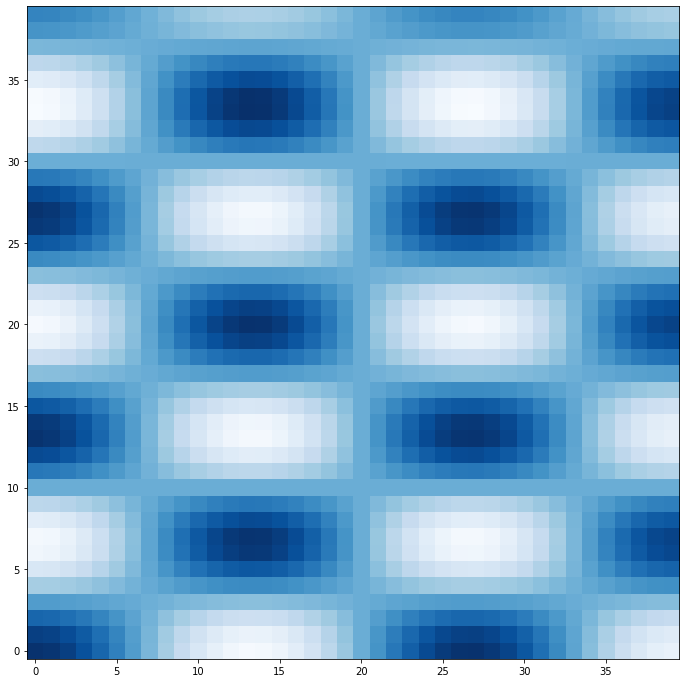

In [53]:
start_time = time.time()
error = LA.norm(x - x_next)

while(error > eps):
    if(step % 2 == 0):
        tau = tau1
    else:
        tau = tau2
    print('tau = ', tau)
    C = e - tau * A
    x_next = np.dot(C, x) + tau * f
    error = LA.norm(x - x_next)
    print("Error >> ", error, " x_next:")
    x = np.copy(x_next)
    step += 1

print("--- %s seconds ---" % (time.time() - start_time))
print("|Ax - f| = ", LA.norm(np.dot(A, x) - f))
pp.figure(figsize=(12,12))
showsol(x, n)

In [3]:
error = LA.norm(x - x_next)
aii = 0
cij = 0
d = 0

i_cur = 0
j_cur = 0
step = -1

start_time = time.time()
iterId = 0

while(error > eps):
    iterId += 1
    for s in range(n):
        for k in range(n):
            step = 0
            x_next[s * n + k] = 0
#             aii = A_val(s * n + k, s * n + k, n)
            aii = A[s * n + k][s * n + k]
            d = f[s * n + k] / aii
            for i in range(n):
                i_cur = i
                for j in range(n):
                    j_cur = j
#                     aij = A_val(s * n + k, i * n + j, n)
                    aij = A[s * n + k][i * n + j]
                    if s * n + k == i * n + j:
                        cij = 0
                    else:
                        cij = (-aij/aii) 
                    x_next[s * n + k] += cij * x_next[i * n + j]
            for i in range(i_cur + 1, n):
                for j in range(j_cur + 1, n):
#                     aij = A_val(s * n + k, i * n + j, n)
                    aij = A[s * n + k][i * n + j]
                    if s * n + k == i * n + j:
                        cij = 0
                    else:
                        cij = (-aij/aii) #sss 
                    x_next[s * n + k] += cij * x[i * n + j]
            x_next[s * n + k] += d
            
    error = LA.norm(x - x_next)
    print("Error >> ", error)
    x = np.copy(x_next)
    
print("--- %s seconds ---" % (time.time() - start_time))
print("|Ax - f| = ", LA.norm(np.dot(A, x) - f))
showsol(x, n)



NameError: name 'x' is not defined

In [22]:
def LUA(x, n, i, j):
    return 4 * x[0] - 2 * x[n] - 2 * x[1]

def RUA(x, n, i, j):
    return 4 * x[n - 1] - 2 * x[n + n - 1] - 2 * x[n - 2]

def LLA(x, n, i, j):
    return 4 * x[(n - 1) * n] - 2 * x[(n - 2) * n] - 2 * x[(n - 1) * n + 1]

def RLA(x, n, i, j):
    return 4 * x[(n - 1) * n + n - 1] - 2 * x[(n - 2) * n + n - 1] - 2 * x[(n - 1) * n + n - 2]

def Left(x, n, i, j):
    return 4 * x[i * n + j] - 2 * x[i * n + j + 1] - x[(i - 1) * n + j] - x[(i + 1) * n + j]

def Right(x, n, i, j):
    return 4 * x[i * n + j] - 2 * x[i * n + j - 1] - x[(i - 1) * n + j] - x[(i + 1) * n + j]

def Low(x, n, i, j):
    return 4 * x[i * n + j] - 2 * x[(i - 1) * n + j] - x[i* n + j - 1] - x[i * n + j + 1]

def Up(x, n, i, j):
    return 4 * x[i * n + j] - 2 * x[(i + 1) * n + j] - x[i* n + j - 1] - x[i * n + j + 1]

def Inside(x, n, i, j):
    return 4 * x[i * n + j] - x[(i + 1) * n + j] - x[i* n + j - 1] - x[i * n + j + 1] - x[(i - 1) * n + j]

def SetFuncVec(f, n):
    for i in range(n):
        for j in range(n):
            if i == 0 and j == 0:
                f.append(LUA)
                continue
            elif i == 0 and j not in list(range(1, n - 1)):
                f.append(Up)
                continue
            elif i == 0 and j == n - 1:
                f.append(RUA)
                continue
            elif i == n - 1 and j == 0:
                f.append(LLA)
                continue
            elif i == n - 1 and j in list(range(1, n - 1)):
                f.append(Low)
                continue
            elif i == n - 1 and j == n - 1:
                f.append(RLA)
                continue
            elif i in list(range(1, n - 1)) and j == 0:
                f.append(Left)
                continue
            elif i in list(range(1, n - 1)) and j == n - 1:
                f.append(Right)
                continue
            else:
                f.append(Inside)
                continue
            

In [69]:
func = []

SetFuncVec(func, n)
x1 = np.ones( n**2 )
res = np.zeros( n**2 )

for i in range(n):
    for j in range(n):
        res[i * n + j] = f[i * n + j](x1, n, i, j)
        
def Operator(f, x, n):
    res = np.zeros( n**2 )
    
    for i in range(n):
        for j in range(n):
            res[i * n + j] = f[i * n + j](x, n, i, j)
            
    return res

TypeError: 'numpy.float64' object is not callable

tau =  0.11602567346431139
Error >>  0.00116025673464311  x_next:
tau =  0.11602543374882626
Error >>  0.0011345277027768994  x_next:
tau =  0.11602567346431139
Error >>  0.001109565472881814  x_next:
tau =  0.11602543374882626
Error >>  0.0010852416928563517  x_next:
tau =  0.11602567346431139
Error >>  0.0010615125283502302  x_next:
tau =  0.11602543374882626
Error >>  0.0010383368698524986  x_next:
tau =  0.11602567346431139
Error >>  0.0010157003995198725  x_next:
tau =  0.11602543374882626
Error >>  0.0009935761052138033  x_next:
tau =  0.11602567346431139
Error >>  0.0009719566557571273  x_next:
tau =  0.11602543374882626
Error >>  0.000950819821996101  x_next:
tau =  0.11602567346431139
Error >>  0.0009301607897252453  x_next:
tau =  0.11602543374882626
Error >>  0.0009099596990998853  x_next:
tau =  0.11602567346431139
Error >>  0.0008902128905666603  x_next:
tau =  0.11602543374882626
Error >>  0.0008709020179115107  x_next:
tau =  0.11602567346431139
Error >>  0.0008520240539

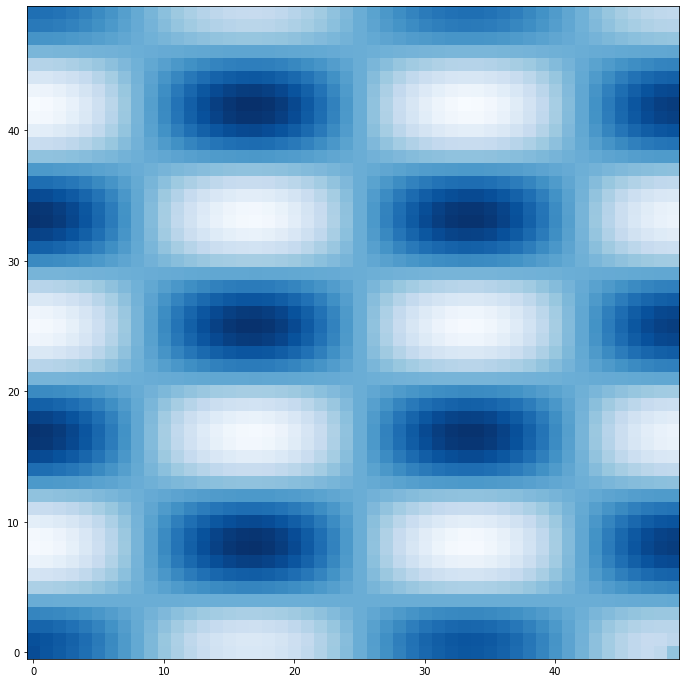

In [70]:
n = 50
f = np.zeros( n**2 )
SetF(f, n)

x = np.ones( n**2 )
x_next = np.zeros( n**2 )

start_time = time.time()
error = LA.norm(x - x_next)

while(error > eps):
    if(step % 2 == 0):
        tau = tau1
    else:
        tau = tau2
    print('tau = ', tau)
    C = e - tau * A
    x_next =  x - tau * Operator(func, x, n)  + tau * f
    error = LA.norm(x - x_next)
    print("Error >> ", error, " x_next:")
    x = np.copy(x_next)
    step += 1

print("--- %s seconds ---" % (time.time() - start_time))
print("|Ax - f| = ", LA.norm(Operator(func, x, n) - f))
pp.figure(figsize=(12,12))
showsol(x, n)

In [62]:
tau1

0.11602543374882626

In [63]:
tau2

0.11602567346431139